In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'365']

In [6]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['NH3']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=10)

In [8]:
forest = RandomForestRegressor(n_estimators=1500,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=3,
                              min_samples_leaf=2,random_state=42)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=1500, random_state=42)

In [9]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8651551039473409

Score on test data: 0.7531068194717878

Root Mean Squared Error: 7.873215186428352

Overall model accuracy: 0.7531068194717878


In [10]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [11]:
predict=forest.predict(X)

In [12]:
predict

array([26.42970849, 26.3964004 , 25.86350909, 26.06780915, 26.05966149,
       25.56032809, 25.10398735, 25.93501388, 25.89002846, 25.29491867,
       24.90905646, 24.00281599, 25.74140708, 25.48406159, 25.36136188,
       24.66430301, 26.07293729, 26.06778876, 25.52775891, 24.72524599,
       23.82184424, 25.89604957, 25.4232787 , 25.00346848, 24.51959053,
       25.78327879, 25.24818395, 25.03969215, 24.43183067, 23.67976646,
       23.50066079, 23.43033785, 23.06476312, 22.74688179, 22.52340804,
       22.92539955, 22.78099764, 22.08960315, 23.0991829 , 23.32410987,
       23.9571169 , 23.07999662, 23.47836875, 23.61347858, 24.04883414,
       23.99447605, 23.57849717, 24.835814  , 25.61954873, 25.69140041,
       25.30887356, 26.72586491])

In [13]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [14]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [15]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [16]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

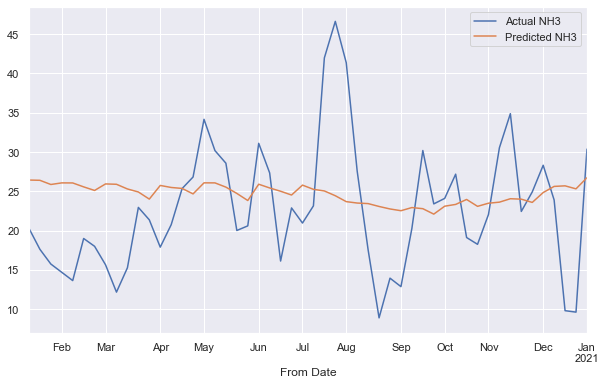

In [17]:
test['NH3'].plot(legend=True, label='Actual NH3', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NH3')


In [18]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 5.657676710544286
MSE: 61.98751737180603
RMSE: 7.873215186428352
R-Squared: 0.7531068194717878


In [19]:
mae = metrics.mean_absolute_error(test['NH3'],X['pred'])
mse = metrics.mean_squared_error(test['NH3'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NH3'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 6.764629448959432
MSE: 71.13780955571346
RMSE: 8.434323301588186
R-Squared: -0.0955677292405317


In [20]:
import pickle
filename = 'NH3_forestmodel.sav'
pickle.dump(forest, open(filename, 'wb'))


In [21]:
pred=X.loc["2020-03-25":"2020-04-14",'pred']
pred.median()

25.48406159213898

In [22]:
ytest.std()

15.953354071770745

In [30]:
pred1=X.loc["2020-04-15":"2020-05-17",'pred']
pred2=X.loc["2020-08-01":"2020-11-30",'pred']
pred3=X.loc["2020-01-30":"2020-03-22",'pred']
pred2.median()

23.377223859609288

# 3rd plot

In [22]:
testcase = pd.DataFrame()

In [23]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [24]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [25]:
testcase

,test,pred,Corrected
211,44.487143,49.395914,41.522699
97,42.504286,42.998411,35.125195
114,29.205714,40.108541,32.235325
6,47.402857,45.602867,53.476082
126,44.430000,39.971755,47.844970
...,...,...,...
69,40.247143,43.162083,35.288867
100,43.951429,46.476207,38.602992
113,45.555714,41.086112,48.959327
219,16.492857,26.204142,18.330927


In [26]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [27]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8482180578176575

In [28]:
test2020=pd.DataFrame()

In [29]:
test2020['test']=test['NH3']
test2020['pred']=X['pred']

In [30]:
test2020.index=test.index

In [31]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

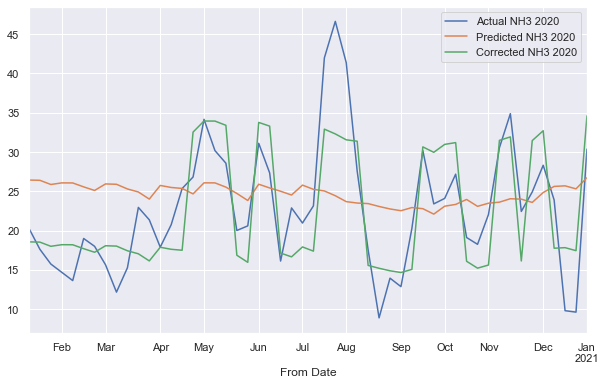

In [32]:
test2020['test'].plot(legend=True, label='Actual NH3 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NH3 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NH3 2020')

In [33]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.5263732986574795

In [35]:
ytest.std()

15.953354071770745

In [36]:
test2020['test'].std()

8.136679549934481